In [144]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use('seaborn-poster')

%matplotlib inline

## Logistics Equation

The logistics equation is given by:
$$\frac{dP}{dt} = rP\left(1-\frac{P}{K}\right).$$

The function `my_logistics_eq(t,P,r,k)` below uses the above form to compute the numerical solution to the given equation at a particular point. In particular, the input values `t`, `P`, `r`, and `K` are all scalar valued, and the output `dP` (the solution to the equation at a specific point) is of type float float. 

In [2]:
def my_logisitcs_eq(t, P, r, K):
    dP = r*P*(1-(P/K))
    return dP

dP = my_logisitcs_eq(0, 10, 1.1, 15)
dP

NameError: name 't' is not defined

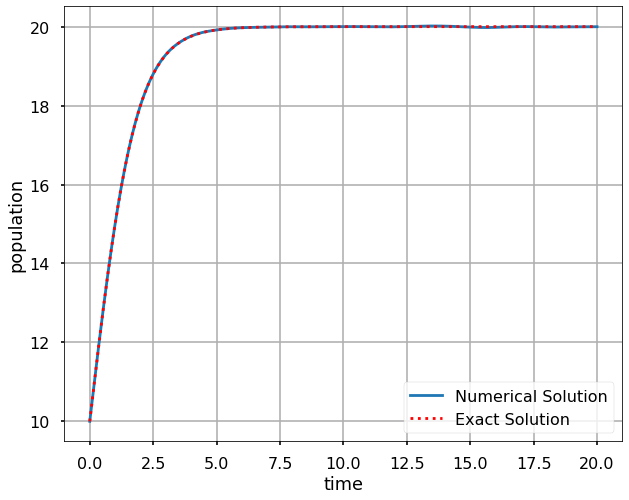

In [145]:
t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

f = partial(my_logisitcs_eq, r=r, K=K)
sol=solve_ivp(f,[t0,tf],[P0],t_eval=t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t, \
  K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', \
            'Exact Solution'])
plt.grid(True)
plt.show()

## Lorenz Equations

The Lorenz attractor is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as:
\begin{alignat}{3}
\frac{dx}{dt} &= \sigma(y-z),\\
\frac{dy}{dt} &= x(\rho - z) - y,\\
\frac{dz}{dt} &= xy - \beta z,
\end{alignat}
where $x$, $y$, and $z$ represent position in three dimensions and $\sigma$, $\rho$, and $\beta$ are scalar parameters of the system.

Write a function `my_lorenz(t,S,sigma,rho,beta)`, where `t` is a scalar denoting time, `S` is a (3,) array denoting the position $(x,y,z)$, and `sigma`, `rho`, and `beta` are strictly positive scalars represnting $\sigma$, $\rho$, and $\beta$. The output argument `dS` should be the same size as `S`. 

In [137]:
def my_lorenz(t, S, sigma, rho, beta):
    
    # make sure conditions are met for parameters

    if sigma <= 0:
        raise ValueError('sigma must be a positive integer')
    elif rho <= 0:
        raise ValueError('rho must be a positive integer')
    elif beta <= 0:
        raise ValueError('beta must be a positive integer')

    x, y, z = s
    dx = sigma*(y-x)               # defines dx/dt as stated in system for Lorenz
    dy = x*(rho-z)-y               # defines dy/dt as stated in system for Lorenz
    dz = x*y - beta*z              # defines dz/dt as stated in system for Lorenz
    dS = np.array([dx, dy, dz])
    return dS

s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8/3)
dS

array([10., 23., -6.])

Write a function `my_lorenz_solver(t_span,s0, sigma, rho, beta)` that solves the Lorenz equation using `solve_ivp`. The function returns `[T,X,Y,Z]`; the input argument `t_span` should be a list of the form `[t0, t,f]`, where `t0` is the initial time, and `tf` is the final time of consideration. The input argument `s0` should be a (3,) array of the form `[x0;y0;z0]`, where $(x_{0},y_{0},z_{0})$ represents the initial position. Finally, the input arguments sigma, rho, and beta are the scalar parameters $\sigma$, $\rho$, and $\beta$ of the Lorenz system. The output arguement `T` should be an array of times given as the output argument of `solve_ivp`. The output arguments `X`, `Y`, and `Z` should be the numerically integrated solution produced from `my_lorenz` in the previous problems and `solve_ivp`. 


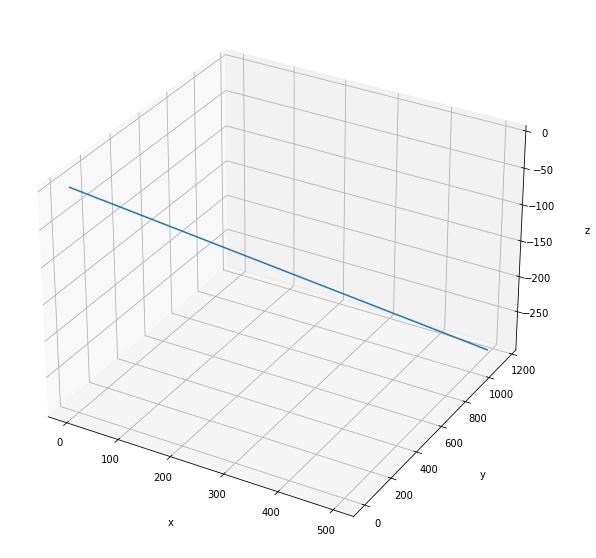

In [138]:
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    t = np.linspace(t0,tf,10000)
    T = solve_ivp(my_lorenz, t_span, s0, args = (sigma,rho,beta),dense_output=True)
    X, Y, Z = T.sol(t)
    return [T, X, Y, Z]

sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], \
                        s0, sigma, rho, beta)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(X, Y, Z)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()